<a href="https://colab.research.google.com/github/2303A51272/ADM-Lab/blob/main/ADM_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('titanic.csv')
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df = df.dropna()
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Fare']])


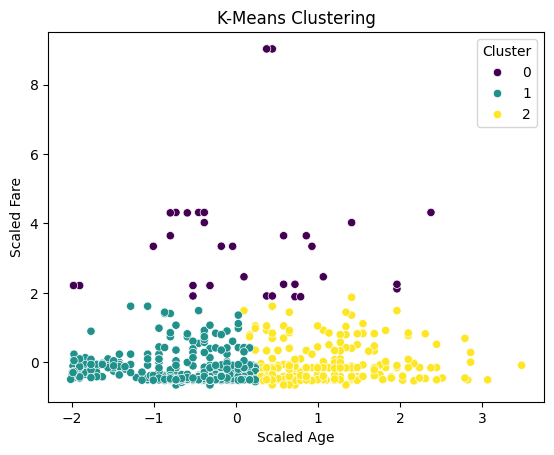

In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Fare')
plt.show()


In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage


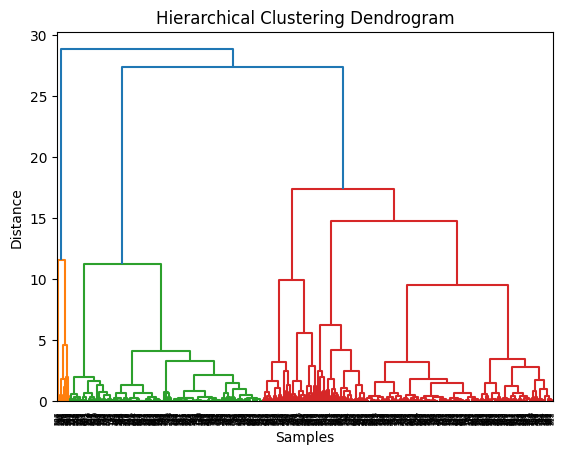

In [5]:
linkage_data = linkage(scaled_data, method='ward')
dendrogram(linkage_data)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


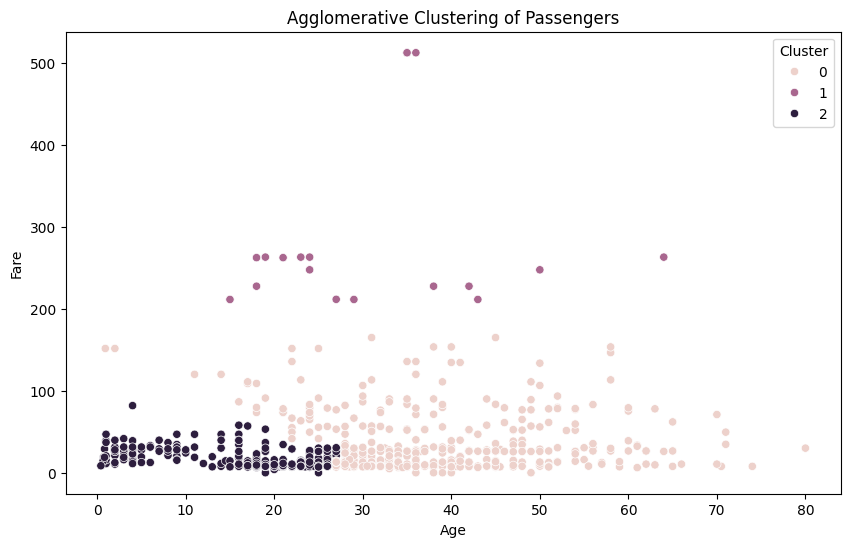

In [11]:

X = df[['Age', 'Fare']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agg_clustering.fit_predict(X_scaled)
X['Cluster'] = clusters
X = df[['Age', 'Fare']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agg_clustering.fit_predict(X_scaled)
X['Cluster'] = clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Age'], y=X['Fare'], hue=X['Cluster'])
plt.title('Agglomerative Clustering of Passengers')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()